In [57]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = True
sns.set()

In [58]:
df = pd.read_csv ('collectedMetrics.csv')

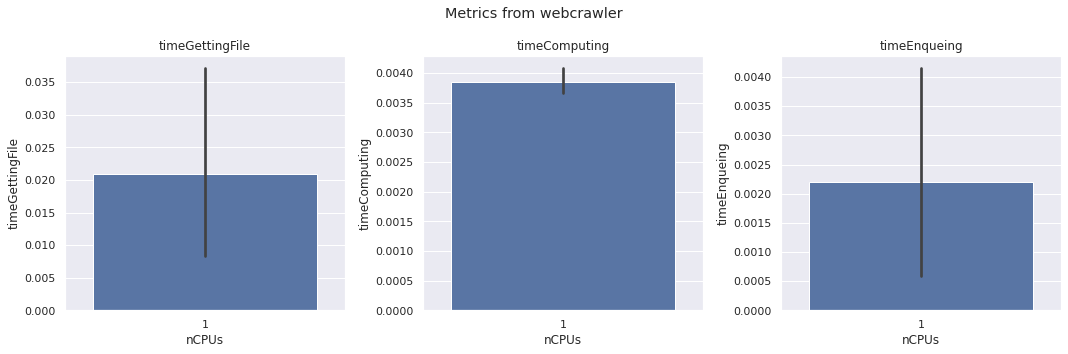

In [59]:
interestedCollumns = ["timeGettingFile", "timeComputing", "timeEnqueing"]
fig, axes = plt.subplots(1, len(interestedCollumns), figsize=(15,5))
fig.suptitle('Metrics from webcrawler')

for i, collumnTitle in enumerate(interestedCollumns):
    sns.barplot(ax=axes[i], x="nCPUs", y=collumnTitle, data=df)
    axes[i].set_title(collumnTitle)

Text(0, 0.5, 'Time Getting File %')

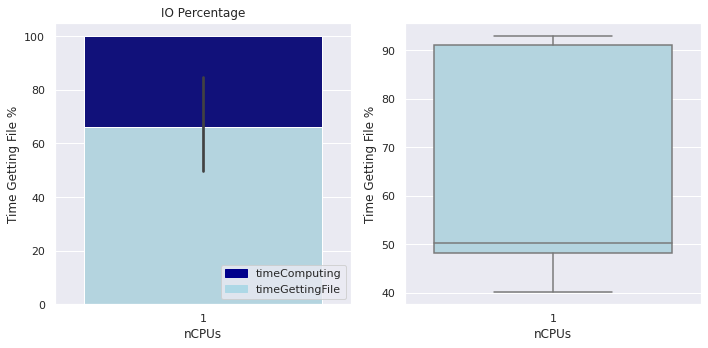

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# from raw value to percentage
percentDF = pd.DataFrame()
percentDF = df[['nCPUs', 'timeGettingFile', 'timeComputing']].copy()
percentDF["total"] = df["timeGettingFile"] + df["timeComputing"]
percentDF["timeGettingFilePercent"] = df["timeGettingFile"] / percentDF["total"] * 100
percentDF["total"] = 100

ax=axes[0]
bar1 = sns.barplot(x="nCPUs", y="total", data=percentDF, color='darkblue', ax=ax)
bar2 = sns.barplot(x="nCPUs", y="timeGettingFilePercent", data=percentDF, color='lightblue', ax=ax)

ax.set_title('IO Percentage')
ax.set_ylabel('Time Getting File %')
# add legend
top_bar = mpatches.Patch(color='darkblue', label='timeComputing')
bottom_bar = mpatches.Patch(color='lightblue', label='timeGettingFile')
ax.legend(handles=[top_bar, bottom_bar], loc="lower right")

ax=axes[1]
sns.boxplot(ax=ax, x="nCPUs", y="timeGettingFilePercent", color='lightblue', data=percentDF)
ax.set_ylabel('Time Getting File %')

In [54]:
percentDF

,nCPUs,timeGettingFile,timeComputing,total,timeGettingFilePercent
0,1,0.007158,0.040571,0.047729,14.996678
1,1,0.003944,0.039125,0.043069,9.156633
2,1,0.029390,0.037765,0.067155,43.764090
3,1,0.005814,0.038394,0.044208,13.151551
4,1,0.088677,0.043706,0.132383,66.985019
5,1,0.004460,0.068714,0.073174,6.094847
6,1,0.003273,0.053696,0.056969,5.744861
